# 6. Time Series Data Models

## 6.1. ARIMA(Autogressive Integrated Moving Average) Model

In [160]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [163]:
# Generate data
np.random.seed(85)

dates_arima = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values_arima = np.random.randn(1000)

dates_arima, values_arima

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
        

In [164]:
# Create dataframe
data_arima = pd.DataFrame({
    'Date': dates_arima,
    'Values': values_arima
})

data_arima

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
995,2025-09-22,1.093493
996,2025-09-23,-0.461639
997,2025-09-24,0.801533
998,2025-09-25,-1.393133


In [165]:
# Add missing values
data_arima.loc[100:200, 'Values'] = np.nan

print(data_arima.loc[100:200])

          Date  Values
100 2023-04-11     NaN
101 2023-04-12     NaN
102 2023-04-13     NaN
103 2023-04-14     NaN
104 2023-04-15     NaN
..         ...     ...
196 2023-07-16     NaN
197 2023-07-17     NaN
198 2023-07-18     NaN
199 2023-07-19     NaN
200 2023-07-20     NaN

[101 rows x 2 columns]


order=(1,1,1) 매개변수를 사용하여 ARIMA 모델을 설정합니다. order 매개변수는 AR, 차분(Differencing), MA 성분을 지정합니다. 여기서 (1,1,1)은 AR(1) 모델, 차분(degree of differencing)이 1, 그리고 MA(1) 모델을 의미합니다.
ARIMA 모델은 시계열 데이터의 자동회귀(AR) 성분, 차분(Differencing) 성분, 이동평균(MA) 성분을 모두 고려하여 시계열 패턴을 모델링합니다..

In [173]:
# ARIMA model

# Get ARIMA model without missing values
model_arima = ARIMA(data_arima['Values'].dropna(), order=(1,  # Automagressive model
                                                          1,  # Degree of Difference
                                                          1)) # Moving Average

# Train the model
model_arima_fit = model_arima.fit()

C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [171]:
# Predict missing values
predicted_values = model_arima_fit.predict(start=100, end=2000)

predicted_values

C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


100    -0.092678
101    -0.072469
102    -0.070779
103    -0.106376
104    -0.073661
          ...   
1996    0.000630
1997    0.000630
1998    0.000630
1999    0.000630
2000    0.000630
Name: predicted_mean, Length: 1901, dtype: float64

In [172]:
# Replace missing values with Predicted values by ARIMA model
data_arima.loc[100:200, 'Value_ARIMA'] = predicted_values
print(data_arima.loc[100:200])

          Date  Values  Value_ARIMA
100 2023-04-11     NaN    -0.092678
101 2023-04-12     NaN    -0.072469
102 2023-04-13     NaN    -0.070779
103 2023-04-14     NaN    -0.106376
104 2023-04-15     NaN    -0.073661
..         ...     ...          ...
196 2023-07-16     NaN    -0.083252
197 2023-07-17     NaN    -0.031421
198 2023-07-18     NaN    -0.031956
199 2023-07-19     NaN    -0.049374
200 2023-07-20     NaN    -0.042439

[101 rows x 3 columns]


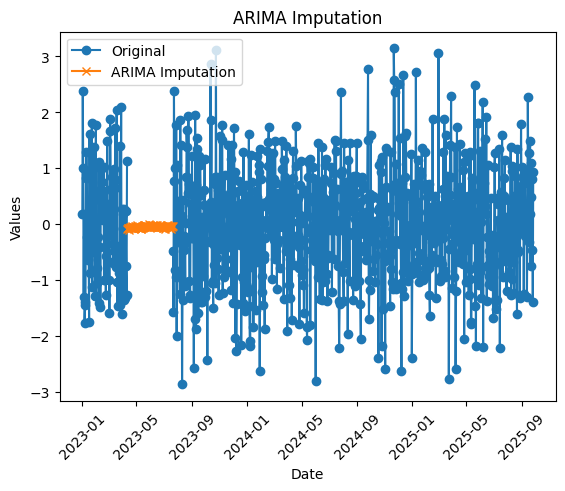

In [175]:
# Visualization
plt.plot(data_arima['Date'], data_arima['Values'], 'o-', label='Original')
plt.plot(data_arima['Date'], data_arima['Value_ARIMA'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Imputation')
plt.legend()
plt.xticks(rotation=45)
plt.show()